In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
%matplotlib inline
import cmocean
import cmocean.cm as cmo

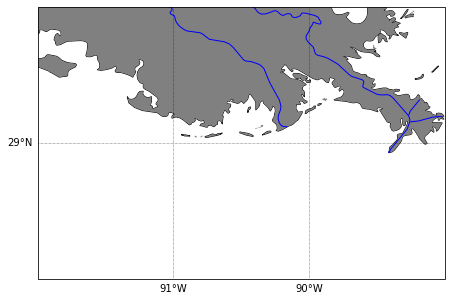

In [6]:
lat_top=30
lat_bot=28
lon_left=-92.
lon_rigth=-89
extent=[lon_left, lon_rigth, lat_bot, lat_top]

# set resolution of the features in map: '10m', '50m', or '110m'.  
# If you do this the first time it will take a while downloading the coastline 
# and other features. In the future it will be faster
res = '10m'

#Figure

fig = plt.figure(figsize=(10,5)) # set fig size. You will probably want to change this
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) #set cartographic projection. There are a bunch
ax.set_extent(extent) # set the extent, or the box of the map
ax.coastlines(res) # set coastilines, and resolution 

#land
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='land',
                                            facecolor='grey', # change color here
                                            scale=res)) 
#Rivers
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='rivers_lake_centerlines',
                                            edgecolor='blue', # change color here
                                            facecolor='none',
                                            scale=res))

#Gir. Only if you want one:
gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                  ylocs=np.arange(lat_bot, lat_top+1),
                  draw_labels=True, 
                  linewidth=0.5, color='k', linestyle=':')
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

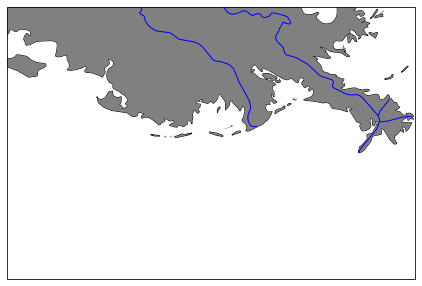

In [8]:
lat_top=26
lat_bot=24
lon_left=-82.
lon_rigth=-80
extent2=[lon_left, lon_rigth, lat_bot, lat_top]

res = '10m'

#Figure

fig = plt.figure(figsize=(10,5)) # set fig size. You will probably want to change this
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) #set cartographic projection. There are a bunch
ax.set_extent(extent) # set the extent, or the box of the map
ax.coastlines(res) # set coastilines, and resolution 

#land
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='land',
                                            facecolor='grey', # change color here
                                            scale=res)) 
#Rivers
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                            name='rivers_lake_centerlines',
                                            edgecolor='blue', # change color here
                                            facecolor='none',
                                            scale=res))

#Gir. Only if you want one:
gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                  ylocs=np.arange(lat_bot, lat_top+1),
                  draw_labels=True, 
                  linewidth=0.5, color='k', linestyle=':')
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [4]:
def plot_mapbase(extent, res='10m', projection=ccrs.PlateCarree()):
    fig = plt.figure(figsize=(10,5)) # set fig size
    ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                                scale=res))
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15, 'color': 'white'}
    gl.ylabel_style = {'size': 15, 'color': 'white'}
    return fig, ax

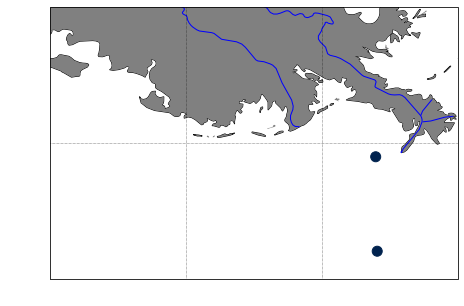

In [12]:
# set the thigs above. I am making fake data for the example:
lons = [ -89.602153, -89.590957]
lats = [28.898021, 28.202903]
var = [1, 1]
site = ["St. 2","St. 11"]

fig, ax = plot_mapbase(extent)
mappable = ax.scatter(lons, lats, # lon, lat variable as x,y
           c=var,  #you color variable
#            vmin=10, vmax=100, # This is usefull if you want to compare maps and want to set a fixed min and max value
           cmap= 'cividis', # colormap. look for other colormaps https://matplotlib.org/stable/tutorials/colors/colormaps.html
            s=100, # your size variable. Can get rid if don't need
           transform=ccrs.PlateCarree())


#make the colorbar
#cb = fig.colorbar(mappable)
#cb.set_label('Abs 350 nm incrase per day')
fig.savefig('../MAPS_Figures/PW_sites.png')